# GPT 개요


## Introduction
- OpenAI 에서 개발한 트랜스포머 기반의 언어 모델
- Improving Language Understanding by Generative Pre-Training 논문에서 소개
- BERT보다 앞서 사전학습 기법을 활용해 여러 문제에서 당시의 기존 모델들보다 높은 성능을 보여준 바 있음

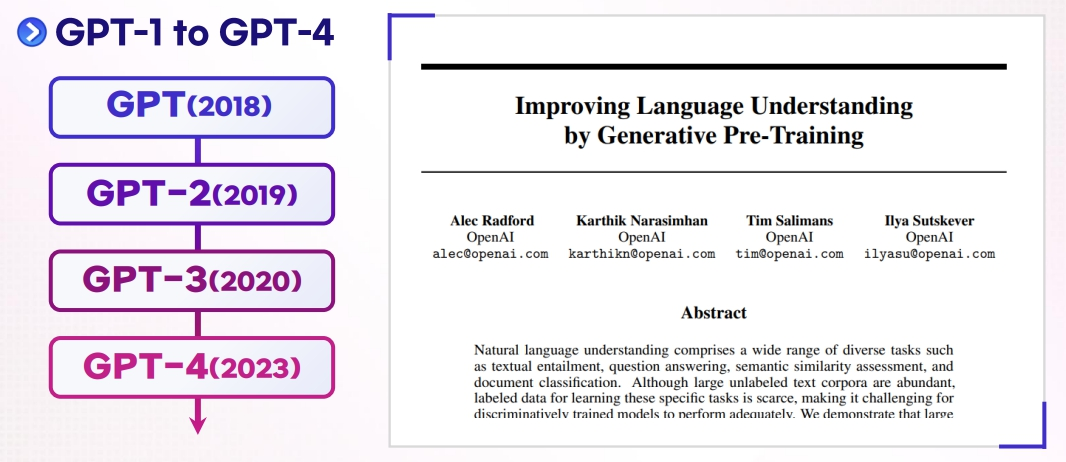

## GPT(Generative Pre-Training)
- GPT는 BERT와 마찬가지로 매우 큰 자연어 데이터를 활용해 사전 학습한 후 학습된 가중치를 활용해 새로운 문제에 미세 조정하는 방법론의 모델
- 트랜스포머에서 디코더 구조만을 사용
- 순방향 마스크 어텐션을 사용


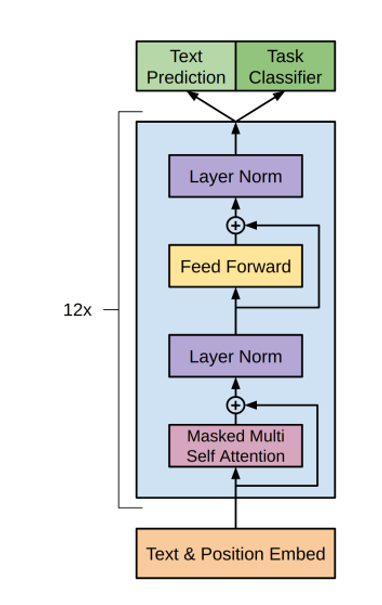

## Unsupervised pre-training
- BERT와 달리 전통적인 언어 모델 방식으로 사전 학습
- 앞의 단어들을 활용해 다음 단어를 예측하는 방식
- Label이 별도로 존재하지 않는 데이터라도 학습을 진행할 수 있기 때문에 Unsupervised pre-training으로 분류


## Framework
- 언어 모델로 사전 학습 ->  개별 과제에 미세 조정

$$
L3(C) = L2(C) + λ ∗ L1(C)
$$


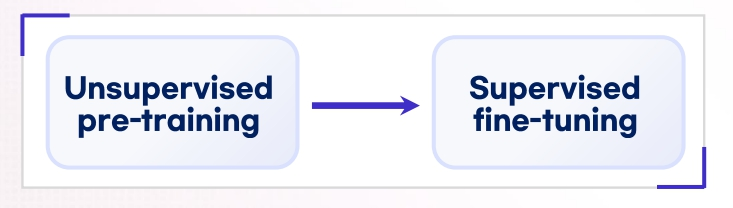

## Task-specific input transformations
- 4개의 downstream task에 대한 input 형태를 제안

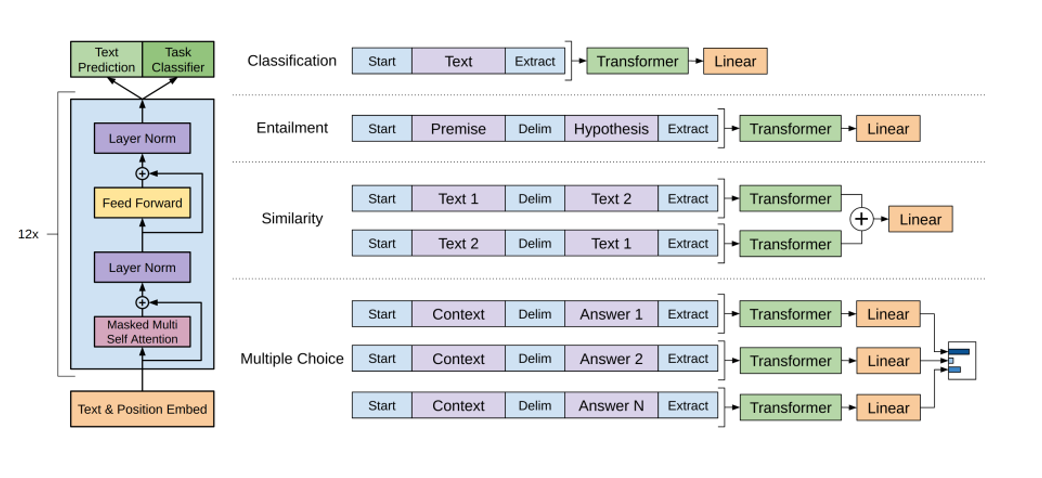

# GPT-2
- 대량의 데이터셋으로 사전학습 -> Zero-shot learning을 시도
- 다양한 도메인에서의 과제를 수행하기 위해 소셜 미디어인 Reddit 에서 최소 3점을 받은 외부링크로부터 크롤링을 시작
    - 4500만 개의 링크의 텍스트를 추출하여 정제
- 40GB 크기의 800만개의 문서를 학습데이터로 사용
- 더 큰 모델일수록 다양한 과제에서 높은 Zero-shot 성능을 보임

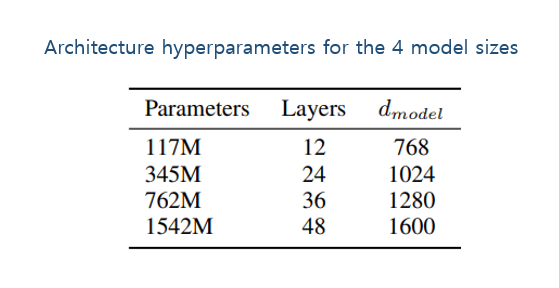

# GPT-3
- 언어 모델을 통한 메타 학습
    - 언어 모델 학습을 통해 다양한 종류의 과제를 특정 맥락에서 학습
    - 위와 같은 과정을 충분히 반복하면 새로운 과제도 잘 수행할 수 있을 것
- Few-Shot learning을 시도
    - Zero-shot learning 과 방식이 동일하나 추론단계에서 예시를 제시
- Model and Architectures
    - GPT-2 에 비해 모델 크기가 비약적으로 커짐
    - 15억개 -> 1750억개


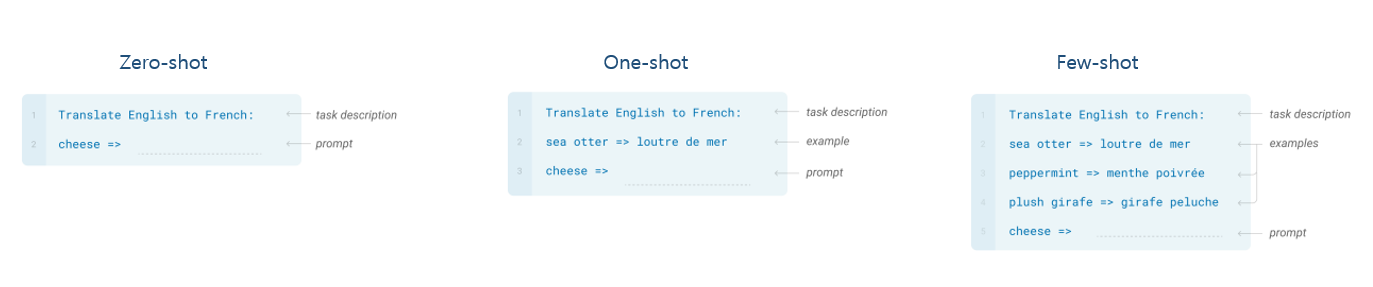

- Results

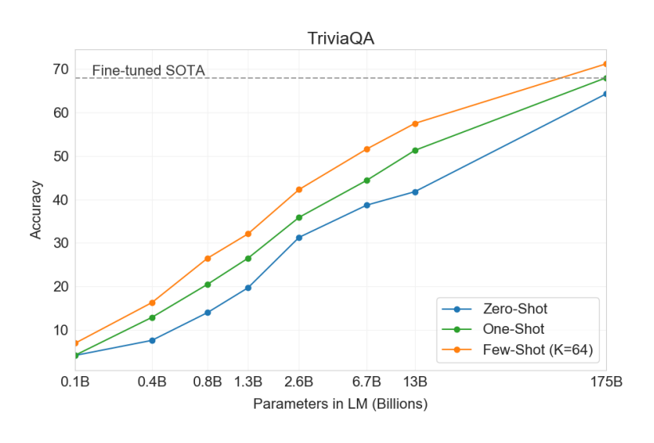

# GPT-4
- OpenAI가 개발한 GPT 시리즈의 4번째 언어모델
- OpenAI가 GPT-4 모델을 출시하면서, 성능 지표와 실험 결과가 포함된 technical report를 함께 공개
    - GPT-4의 성능을 보여주는 부분과 GPT-4가 적절하지 않은 prompt를 어떻게 걸러내는지 설명하는 부분으로 구성
    - 기존의 GPT 모델과 다르게, 텍스트 prompt뿐만 아니라, 텍스트와 이미지가 혼합된 prompt도 처리할 수 있는 Multimodal 을 강조
- GPT-4의 모델 크기 및 학습 방법 등을 공개하지 않음
- 더 복잡한 상황에서 자연어 텍스트를 이해하고 생성하는 것을 목표
    - 성능을 테스트하기 위해 사람을 위해 만들어진 시험 문제를 풀게 함
    - 객관식 및 주관식을 포함하고 필요한 경우 이미지도 input으로 함께 넣음
    - 테스트의 사용되었던 전문적, 학술적인 시험 대부분에서 GPT-4는 사람과 비슷한 점수를 얻음
    - 특히, 미국 변호사 시험에서는 상위 10%의 성적을 기록





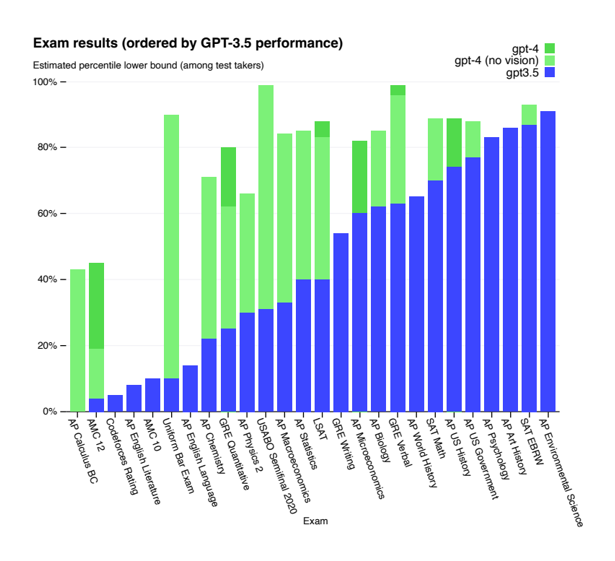

In [1]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

DATA_PATH = "../data/"
SEED = 42

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [2]:
df = pd.read_csv(f"{DATA_PATH}chat_dataset.csv")
df

,question,answer
0,죽을거 같네,나쁜 생각 하지 마세요.
1,내일 시험이야,컨디션 조절 하세요.
2,정말.내 자신이 싫다,자신은 사랑해주세요.
3,이별후 네달째,바쁘게 살면서 잊어가요.
4,쌍커풀 해볼까,눈은 기본이죠.
...,...,...
11818,좋아했지만 고백은 못하겠어.,애틋한 사랑이네요.
11819,화장실!!,화장실 가세요.
11820,6개월이 지나도 왜이런거죠?,물리적 시간에 비례하지 않으니까요.
11821,내가 제일 문제인 듯,당신은 하나밖에 없는 소중한 사람이에요.


# AutoModelForCausalLM 클래스
- Causal Language Modeling 작업에 사용되는 사전 학습 모델을 자동으로 로드하는 데 사용되는 클래스
- Causal Language Modeling
    - 다음 단어를 예측하는 작업에 최적화된 모델링 방식

In [4]:
from transformers import AutoTokenizer, AutoModelForCausalLM

In [5]:
model_name = "skt/kogpt2-base-v2"
model = AutoModelForCausalLM.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/513M [00:00<?, ?B/s]

In [6]:
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(51200, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=51200, bias=False)
)

In [7]:
model.config

GPT2Config {
  "_attn_implementation_autoset": true,
  "_name_or_path": "skt/kogpt2-base-v2",
  "_num_labels": 1,
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "author": "Heewon Jeon(madjakarta@gmail.com)",
  "bos_token_id": 0,
  "created_date": "2021-04-28",
  "embd_pdrop": 0.1,
  "eos_token_id": 1,
  "gradient_checkpointing": false,
  "id2label": {
    "0": "LABEL_0"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0
  },
  "layer_norm_epsilon": 1e-05,
  "license": "CC-BY-NC-SA 4.0",
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "pad_token_id": 3,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_pro

In [8]:
tokenizer = AutoTokenizer.from_pretrained(
    model_name,
    bos_token='</s>',
    eos_token='</s>',
    unk_token='<unk>',
    pad_token='<pad>',
    mask_token='<mask>',
    max_len = 1024
)

tokenizer.json:   0%|          | 0.00/2.83M [00:00<?, ?B/s]

In [9]:
tokenizer.model_max_length

1024

In [10]:
tokenizer.tokenize("안녕하세요. 반갑습니다.")

['▁안녕', '하', '세', '요.', '▁반', '갑', '습니다.']

In [11]:
tokenizer.all_special_ids, tokenizer.all_special_tokens

([1, 5, 3, 6], ['</s>', '<unk>', '<pad>', '<mask>'])

In [12]:
tokenizer.pad_token_id, tokenizer.eos_token_id

(3, 1)

## AutoModelForCausalLM 클래스의 generate 메서드
- 텍스트 생성 작업에서 사용되며, 다양한 파라미터를 통해 텍스트 생성 과정을 세밀하게 제어
- 주요 파라미터
    - inputs: 첫번째 파라미터로 input_ids 전달
    - max_length: 생성할 텍스트의 최대 길이(토큰 단위)
        - 입력 텍스트 + 생성 텍스트의 최대 길이
    - repetition_penalty: 반복되는 단어생성에 대해 패널티를 부과하여 더 자연스러운 텍스트를 생성
        - 기본값: 1.0
        - 1보다 클 경우 반복 억제
    - do_sample: 확률적으로 샘플링 여부 설정(기본값: False)
    - temperature: 소프트 맥스 온도
        - 기본값: 1.0
    - top_k: 다음 단어를 선택할 때, 확률이 가장 높은 k개의 후보만 고려
        - 기본값: 50
    - top_p: 상위 확률의 누적 합이 p 이하가 되는 후보만 선택
        - 기본값: 1.0
    - num_return_sequences: 생성할 텍스트의 개수
        - do_sample=True인 경우만 동작
    - use_cache: 토큰 생성 할때 캐시할지 여부
        - 기본값: False

In [13]:
text = "오늘 저녁 뭐 먹을래?"
x = tokenizer.encode(text, return_tensors="pt") # input_ids 반환
x

tensor([[10070, 17969, 46651, 17003,  7383,   406]])

In [14]:
result = model.generate(
    x,
    max_length=100,
    repetition_penalty=2.0,
    use_cache=True,
    do_sample=True,
    temperature=2.0,
    # num_return_sequences=2
)
result = tokenizer.decode(result[0])
print(result)

오늘 저녁 뭐 먹을래? 내가 잘 먹는 거 보니까 그거 많이 먹고 그래 가지 않았어 그런데 어떡 하면 네. 나 이제 식구가 돼야 되는데 우리 저 새침너도 집에 있는 막걸리와 다 같이 끓여 먹어야 되고 예 그리고 이번에 에 자식은 인제 음 그래서 제가 예전에 먹은 아 그런 게 기억나.
이게 먹구 좀 약간 야성아였어.
오늘 날씨는 이렇게 무겁고 습한 때잖아는 거지 너는 참 상큼하다.
그런 데 가면 너무


# 데이터셋 클래스

In [15]:
class ChatDataset(torch.utils.data.Dataset):
    def __init__(self, df):
        self.question = df["question"].tolist()
        self.answer = df["answer"].tolist()

    def __len__(self):
        return len(self.question)

    def __getitem__(self, i):
        return f"<q>{self.question[i]}</s><a>{self.answer[i]}</s>"

In [16]:
# def collate_fn(lst):
#     return {
#         "x": tokenizer(lst, return_tensors="pt", padding=True, truncation=True)
#     }

In [17]:
class CollateFN:
    def __init__(self, tokenizer):
        self.tokenizer = tokenizer

    def __call__(self, lst):
        return {
            "x": self.tokenizer(lst, return_tensors="pt", padding=True, truncation=True)
        }

collate_fn = CollateFN(tokenizer)

In [18]:
dataset = ChatDataset(df)
dataloader = torch.utils.data.DataLoader(dataset, 2, collate_fn=collate_fn)
batch = next(iter(dataloader))
batch

{'x': {'input_ids': tensor([[ 9724,   455,   405, 23933,  6853,  9144,  7098,     1,  9724,   439,
            405,  7055,  7749,  9658, 11242,  9109,  7801, 25856,     1],
         [ 9724,   455,   405,  7071,  8149, 11950, 22882,     1,  9724,   439,
            405,  8448,  7293,  7812, 12537,  9078,  7801, 25856,     1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}}

In [19]:
lst = ['<q>죽을거 같네</s><a>나쁜 생각 하지 마세요.</s>', '<q>내일 시험이야</s><a>컨디션 조절 하세요.</s>']
tokenizer(lst, return_tensors="pt", padding=True, truncation=True)

{'input_ids': tensor([[ 9724,   455,   405, 23933,  6853,  9144,  7098,     1,  9724,   439,
           405,  7055,  7749,  9658, 11242,  9109,  7801, 25856,     1],
        [ 9724,   455,   405,  7071,  8149, 11950, 22882,     1,  9724,   439,
           405,  8448,  7293,  7812, 12537,  9078,  7801, 25856,     1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [20]:
model(**batch["x"]).logits.shape # batch, seq, 각 단어 클래스 확률

torch.Size([2, 19, 51200])

In [21]:
batch["x"]["input_ids"].shape

torch.Size([2, 19])

In [22]:
tokenizer.pad_token_id

3

# 학습 루프

In [26]:
def train_loop(dataloader, model, loss_function, optimizer, device):
    model.train()
    epoch_loss = 0

    for batch in tqdm(dataloader):
        x = batch["x"].to(device)
        pred = model(**x).logits # batch, seq, 각 단어 클래스 확률
        n_class = pred.shape[-1]
        pred = pred[:, :-1] # 마지막 시퀀스는 eos이므로 제외
        pred = pred.reshape(-1, n_class) # batch * seq, 각 단어 클래스 확률

        trg = x["input_ids"][:, 1:] # batch, seq / 첫 번째 시퀀스는 sos이므로 제외
        trg = trg.flatten() # batch * seq

        mask = trg != 3 # 패딩 토큰 제외
        trg = trg[mask]
        pred = pred[mask]

        loss = loss_function(pred, trg)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    return epoch_loss / len(dataloader)

In [24]:
batch_size = 32
loss_function = torch.nn.CrossEntropyLoss()
epoch = 10

In [27]:
reset_seeds(SEED)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-5)

train_dataset = ChatDataset(df)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle=True, collate_fn=collate_fn)

for i in range(epoch):
    train_loss = train_loop(train_dataloader, model, loss_function, optimizer, device)
    print(f"epoch: {i}, loss: {train_loss}")

  0%|          | 0/370 [00:00<?, ?it/s]

epoch: 0, loss: 2.539950358545458


  0%|          | 0/370 [00:00<?, ?it/s]

epoch: 1, loss: 2.0676300744752627


  0%|          | 0/370 [00:00<?, ?it/s]

epoch: 2, loss: 1.795265538628037


  0%|          | 0/370 [00:00<?, ?it/s]

epoch: 3, loss: 1.572067309392465


  0%|          | 0/370 [00:00<?, ?it/s]

epoch: 4, loss: 1.386177364555565


  0%|          | 0/370 [00:00<?, ?it/s]

epoch: 5, loss: 1.2295449005590904


  0%|          | 0/370 [00:00<?, ?it/s]

epoch: 6, loss: 1.0980254835373646


  0%|          | 0/370 [00:00<?, ?it/s]

epoch: 7, loss: 0.9852480740160555


  0%|          | 0/370 [00:00<?, ?it/s]

epoch: 8, loss: 0.8956952418829943


  0%|          | 0/370 [00:00<?, ?it/s]

epoch: 9, loss: 0.8189798612852355


In [37]:
@torch.no_grad()
def chatbot(model, tokenizer, device, max_length=512):
    model.eval()
    while True:
        text = input("user > ").strip()
        if text == "quit":
            break

        text = f"<q>{text}</s><a>"
        x = tokenizer.encode(text, return_tensors="pt").to(device)
        result = model.generate(
            x,
            max_length=max_length,
            repetition_penalty=2.0,
            use_cache=True,
        )

        q_len = len(text) + 1
        text = tokenizer.decode(result[0])
        print("bot > ", text[q_len:-4])

In [38]:
chatbot(model, tokenizer, device)

user > 안녕하세요
bot >  <a>잘 해결되길 바랄게요.
user > ?
bot >  는 위로봇입니다. 제가 곁에 있을게요.
user > ?
bot >  는 위로봇입니다. 제가 곁에 있을게요.
user > quit
